In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib_venn as venn
from math import pi
from pandas.plotting import parallel_coordinates
import plotly.graph_objs as go
import plotly as py
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
import warnings
warnings.filterwarnings("ignore")
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/red-wine-quality-cortez-et-al-2009/winequality-red.csv


In [2]:
# NaN value leri gorebilmek icin rastgele nan value ler verelim

# Define dictionary
dictionary = {"column1":[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20],
              "column2":[1,2,3,4,np.nan,6,7,8,np.nan,10,np.nan,12,13,14,15,16,np.nan,18,np.nan,20],
              "column3":[1,2,3,4,np.nan,6,7,8,9,10,11,12,13,np.nan,15,16,17,18,np.nan,20]}


# Create data frame from dictionary
data_missingno = pd.DataFrame(dictionary) 

In [3]:
data_missingno.head(10)

,column1,column2,column3
0,1,1.0,1.0
1,2,2.0,2.0
2,3,3.0,3.0
3,4,4.0,4.0
4,5,NaN,NaN
5,6,6.0,6.0
6,7,7.0,7.0
7,8,8.0,8.0
8,9,NaN,9.0
9,10,10.0,10.0


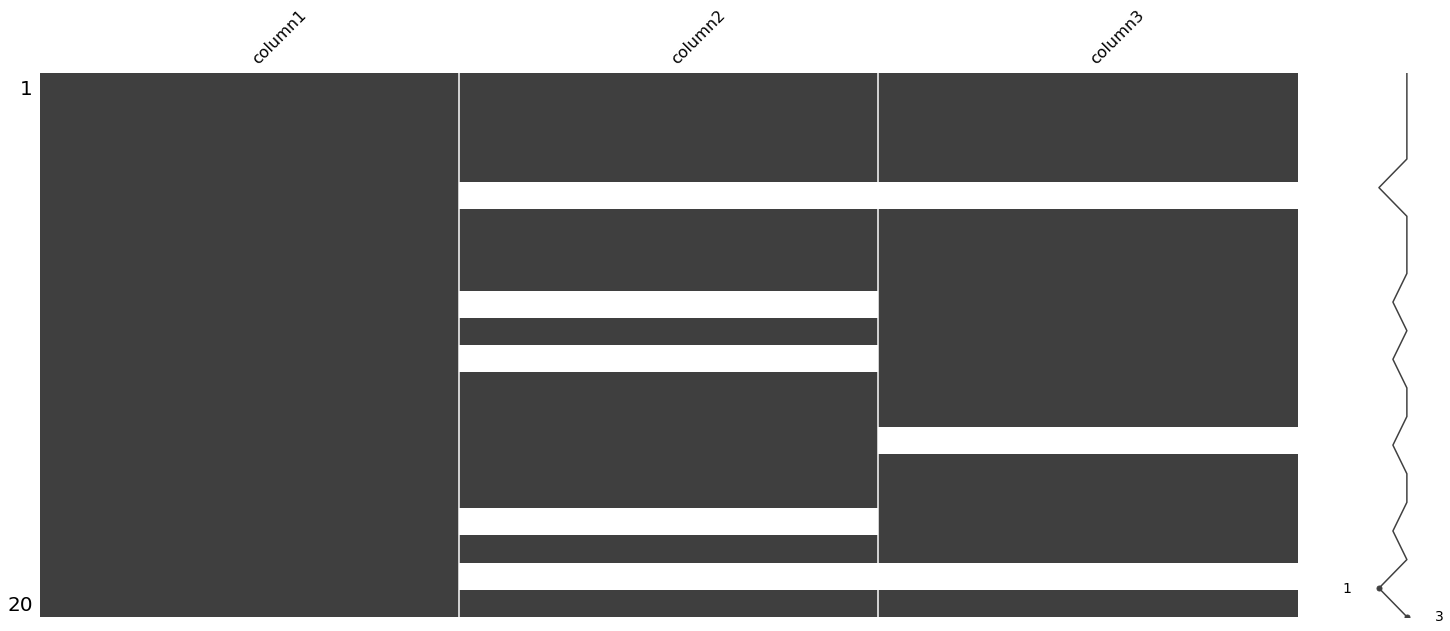

In [4]:
# Hazirladigimiz dataframe gore gorsel olarak bakalim


# import missingno library

import missingno as msno

msno.matrix(data_missingno)
plt.show()

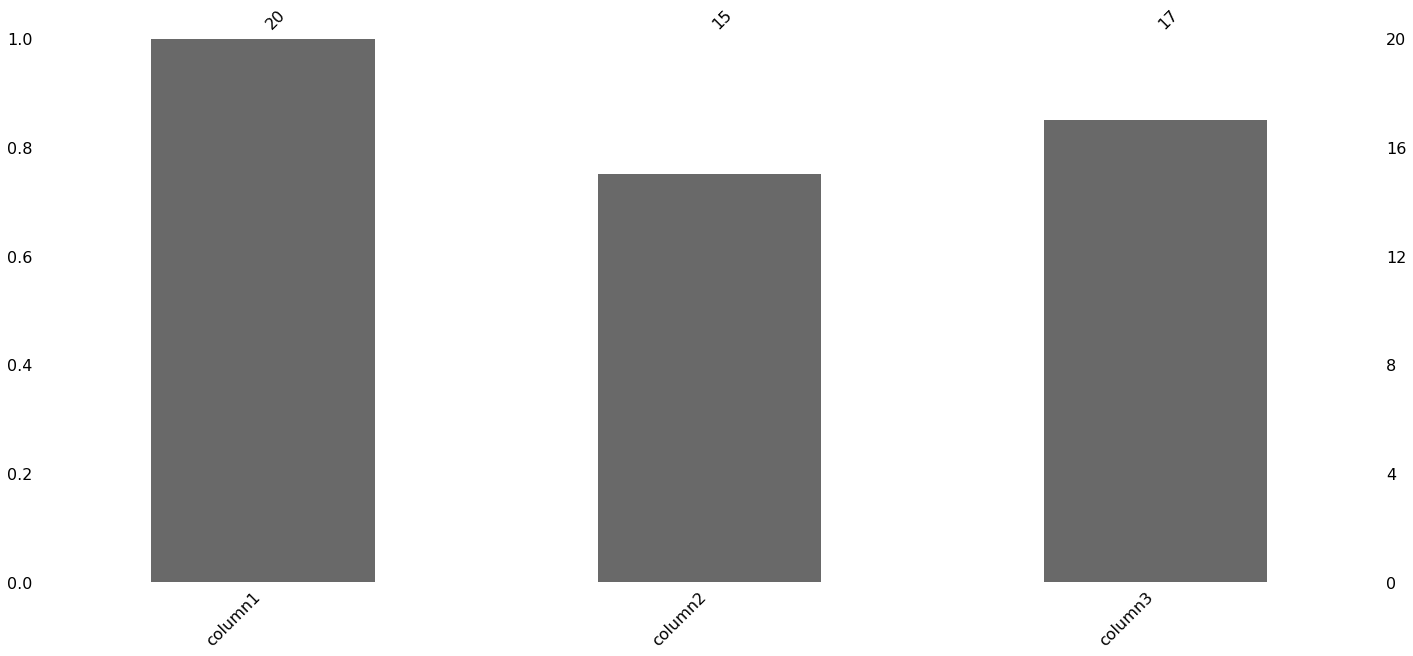

In [5]:
# missingno bar plot
msno.bar(data_missingno)
plt.show()

# Parallel Plots (Pandas)

In [6]:
# load iris data
data = pd.read_csv('/kaggle/input/red-wine-quality-cortez-et-al-2009/winequality-red.csv')
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [7]:
data.rename(columns = {'fixed acidity': 'fixed_acidity', 'volatile acidity': 'volatile_acidity', 'citric acid': 'citric_acid', 'residual sugar': 'residual_sugar',
       'free sulfur dioxide': 'free_sulfur_dioxide', 'total sulfur dioxide': 'total_sulfur_dioxide'}, inplace=True)
data.columns

Index(['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar',
       'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
fixed_acidity           1599 non-null float64
volatile_acidity        1599 non-null float64
citric_acid             1599 non-null float64
residual_sugar          1599 non-null float64
chlorides               1599 non-null float64
free_sulfur_dioxide     1599 non-null float64
total_sulfur_dioxide    1599 non-null float64
density                 1599 non-null float64
pH                      1599 non-null float64
sulphates               1599 non-null float64
alcohol                 1599 non-null float64
quality                 1599 non-null int64
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


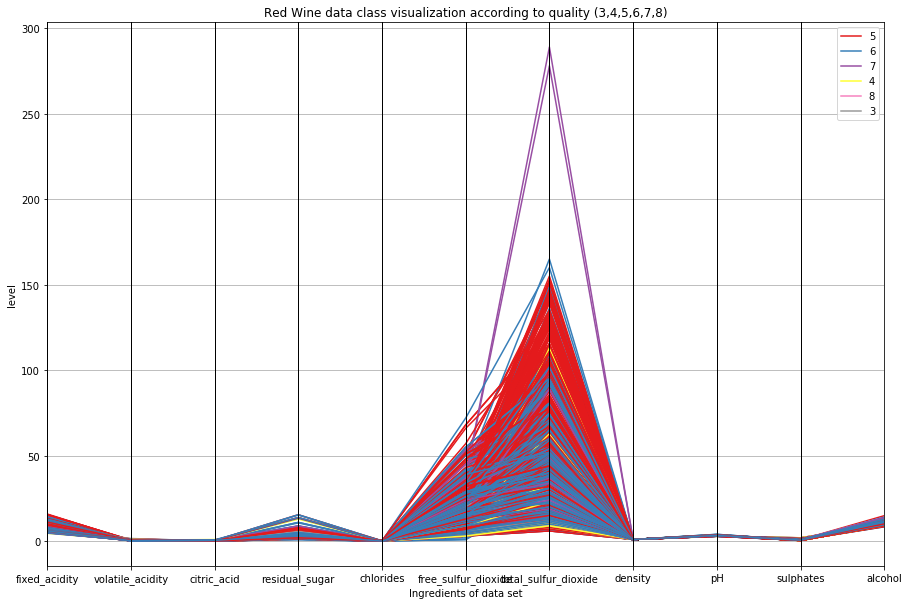

In [9]:
# Make the plot
plt.figure(figsize=(15,10))
parallel_coordinates(data, 'quality', colormap=plt.get_cmap("Set1"))
plt.title("Red Wine data class visualization according to quality (3,4,5,6,7,8)")
plt.xlabel("Ingredients of data set")
plt.ylabel("level")
plt.savefig('graph.png')
plt.show()

# Network Charts (Networkx)

In [10]:
# Calculate the correlation between individuals.
corr = data.iloc[:,0:10].corr()
corr

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates
fixed_acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006
volatile_acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987
citric_acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770
residual_sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260
free_sulfur_dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658
total_sulfur_dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000


In [11]:
# import networkx library
import networkx as nx

# Transform it in a links data frame (3 columns only):
links = corr.stack().reset_index()
links.columns = ['var1', 'var2','value']     # sadece 3 tane sutun aliyoruz cunku 4 ozellikten kendisi haric olani almaliyiz yani 3 adet
links.head(10)

,var1,var2,value
0,fixed_acidity,fixed_acidity,1.000000
1,fixed_acidity,volatile_acidity,-0.256131
2,fixed_acidity,citric_acid,0.671703
3,fixed_acidity,residual_sugar,0.114777
4,fixed_acidity,chlorides,0.093705
5,fixed_acidity,free_sulfur_dioxide,-0.153794
6,fixed_acidity,total_sulfur_dioxide,-0.113181
7,fixed_acidity,density,0.668047
8,fixed_acidity,pH,-0.682978
9,fixed_acidity,sulphates,0.183006


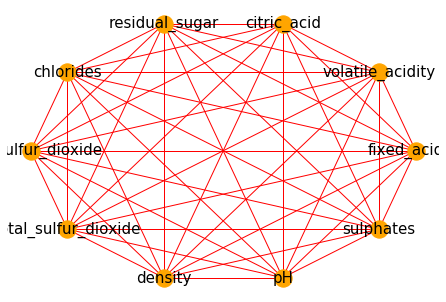

In [12]:
# correlation
threshold = -1           # Simdi bu esik degerine gore aradaki bagi gosteren bir grafik fizelim

# Keep only correlation over a threshold and remove self correlation (cor(A,A)=1)
links_filtered=links.loc[ (links['value'] >= threshold ) & (links['var1'] != links['var2']) ]
 
# Build your graph
G=nx.from_pandas_edgelist(links_filtered, 'var1', 'var2')
 
# Plot the network
nx.draw_circular(G, with_labels=True, node_color='orange', node_size=300, edge_color='red', linewidths=1, font_size=15)

# Venn (Matplotlib)

In [13]:
data.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


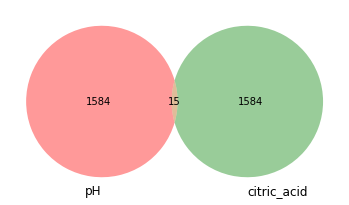

In [14]:
# Venn semasi bize aradaki bagi baglantiyi gosterir.

# venn2
from matplotlib_venn import venn2
pH = data.iloc[:,0]
citric_acid = data.iloc[:,1]
residual_sugar = data.iloc[:,2]
chlorides = data.iloc[:,3]
density = data.iloc[:,4]
# First way to call the 2 group Venn diagram
venn2(subsets = (len(pH)-15, len(citric_acid)-15, 15), set_labels = ('pH', 'citric_acid'))
plt.show()

Donut (Matplotlib)

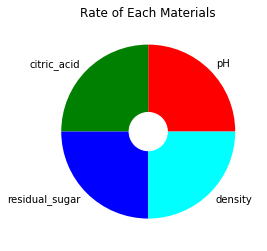

In [15]:
# donut plot
feature_names = "pH","citric_acid","residual_sugar","density"
feature_size = [len(pH),len(citric_acid),len(residual_sugar),len(density)]
# create a circle for the center of plot
circle = plt.Circle((0,0),0.22,color = "white")
plt.pie(feature_size, labels = feature_names, colors = ["red","green","blue","cyan"] )
p = plt.gcf()
p.gca().add_artist(circle)
plt.title("Rate of Each Materials")
plt.show()

# Spider Chart (Matplotlib)

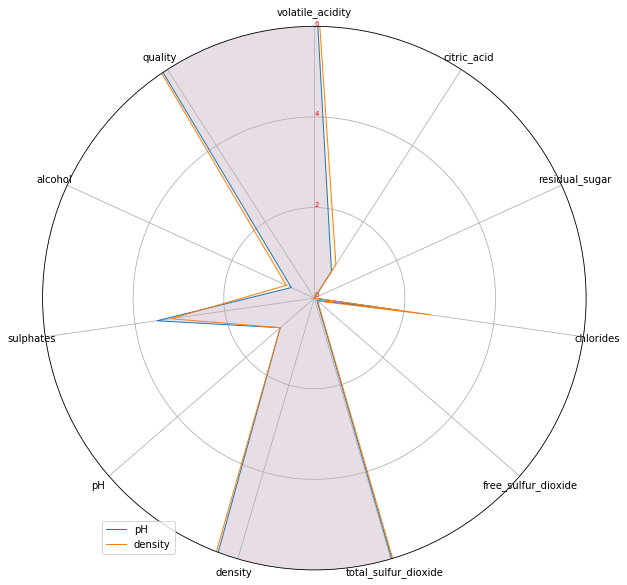

In [16]:
# spider graph
categories = list(data)[1:]
N = len(categories)
angles = [ n / float(N)*2*pi for n in range(N)]
angles = angles + angles[:1]
plt.figure(figsize = (10,10))
ax = plt.subplot(111,polar = True)
ax.set_theta_offset(pi/2)
ax.set_theta_direction(-1)
plt.xticks(angles[:-1],categories)
ax.set_rlabel_position(0)
plt.yticks([0,2,4,6],["0","2","4","6"],color= "red", size = 7)
plt.ylim(0,6)

values = data.loc[0].drop("quality").values.flatten().tolist()
values = values + values[:1]
ax.plot(angles,values,linewidth = 1,linestyle="solid",label ="pH" )
ax.fill(angles,values,"b",alpha=0.1)

values = data.loc[1].drop("quality").values.flatten().tolist()
values = values + values[:1]
ax.plot(angles,values,linewidth = 1,linestyle="solid",label ="density" )
ax.fill(angles,values,"orange",alpha=0.1)
plt.legend(loc = "upper left",bbox_to_anchor = (0.1,0.1))
plt.show()

# Cluster Map (Seaborn)

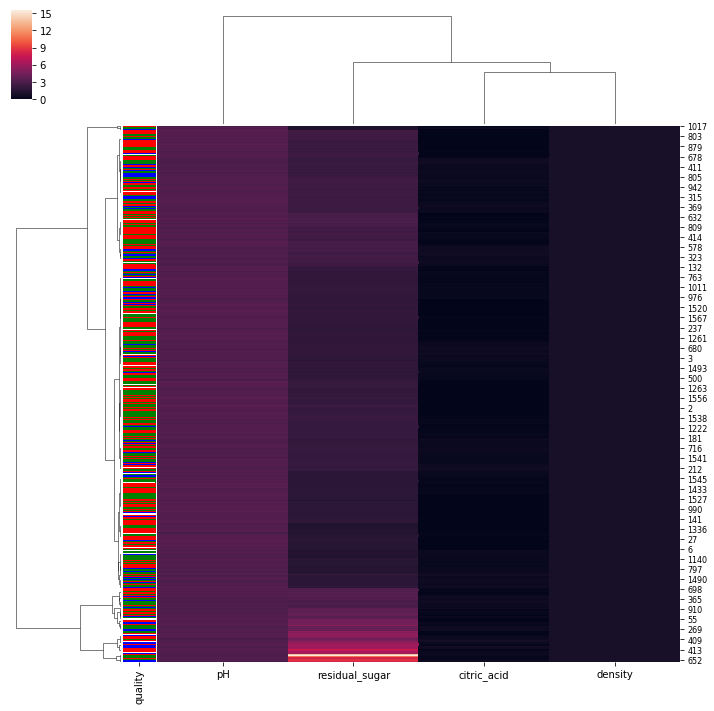

In [17]:
# Hangi ozellikler birbiriyle baglantili oldugunu gosteriyor.


# cluster map (dendogram and tree)

df = data.loc[:,["pH","citric_acid","residual_sugar","density"]]
df1 = data.quality
x = dict(zip(df1.unique(),"rgb"))
row_colors = df1.map(x)
cg = sns.clustermap(df,row_colors=row_colors,figsize=(12, 12),metric="correlation")
plt.setp(cg.ax_heatmap.yaxis.get_majorticklabels(),rotation = 0,size =8)
plt.show()

# Inset Plots (Plotly)

In [18]:
# trace1 is line plot
# go: graph object
trace1 = go.Scatter(
    x=df.index,
    y=df.pH,
    mode = "markers",
    xaxis='x2',
    yaxis='y2',
    name = "pH",
    marker = dict(color = 'rgba(0, 112, 20, 0.8)'),
)

# trace2 is histogram
trace2 = go.Histogram(
    x=df.pH,
    opacity=0.75,
    name = "pH",
    marker=dict(color='rgba(10, 200, 250, 0.6)'))

# add trace1 and trace2
data1 = [trace1, trace2]
layout = go.Layout(
    xaxis2=dict(
        domain=[0.7, 1],
        anchor='y2',        
    ),
    yaxis2=dict(
        domain=[0.6, 0.95],
        anchor='x2',
    ),
    title = ' pH Histogram and Scatter Plot'
)
fig = go.Figure(data=data1, layout=layout)
iplot(fig)

In [19]:
# import data again
data = pd.read_csv('/kaggle/input/red-wine-quality-cortez-et-al-2009/winequality-red.csv')
# data of iris setosa

data.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

# Basic 3D Scatter Plot (Plotly)

In [20]:

quality7 = data[data.quality == 7]
# # data of iris virginica
quality8 = data[data.quality == 8]

# trace1 =  iris setosa
trace1 = go.Scatter3d(
    x=quality7.pH,
    y=quality7.density,
    z=quality7.sulphates,
    mode='markers',
    name = "quality-7",
    marker=dict(
        color='rgb(217, 100, 100)',
        size=12,
        line=dict(
            color='rgb(255, 255, 255)',
            width=0.1
        )
    )
)
# trace2 =  iris virginica
trace2 = go.Scatter3d(
    x=quality8.pH,
    y=quality8.density,
    z=quality8.sulphates,
    mode='markers',
    name = "quality-8",
    marker=dict(
        color='rgb(54, 170, 127)',
        size=12,
        line=dict(
            color='rgb(204, 204, 204)',
            width=0.1
        )
    )
)
data2 = [trace1, trace2]
layout = go.Layout(
    title = ' 3D quality-7 and quality-8',
    margin=dict(
        l=0,
        r=0,
        b=0,
        t=0
    )
)
fig = go.Figure(data=data2, layout=layout)
iplot(fig)